# Python implementation

For more documentation visit
scikit-learn.org

## Problem Statement

* Based on the Pima Indians historical diabetes data build a machine learning binary classification model to predict if the person is diabetic or Not based on below features.

Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

#### Lable

Outcome

In [1]:
# let's start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There is no missing values in our data. Great, let's see the distribution of data:

# Data Preprocessing (Analysis (EDA))

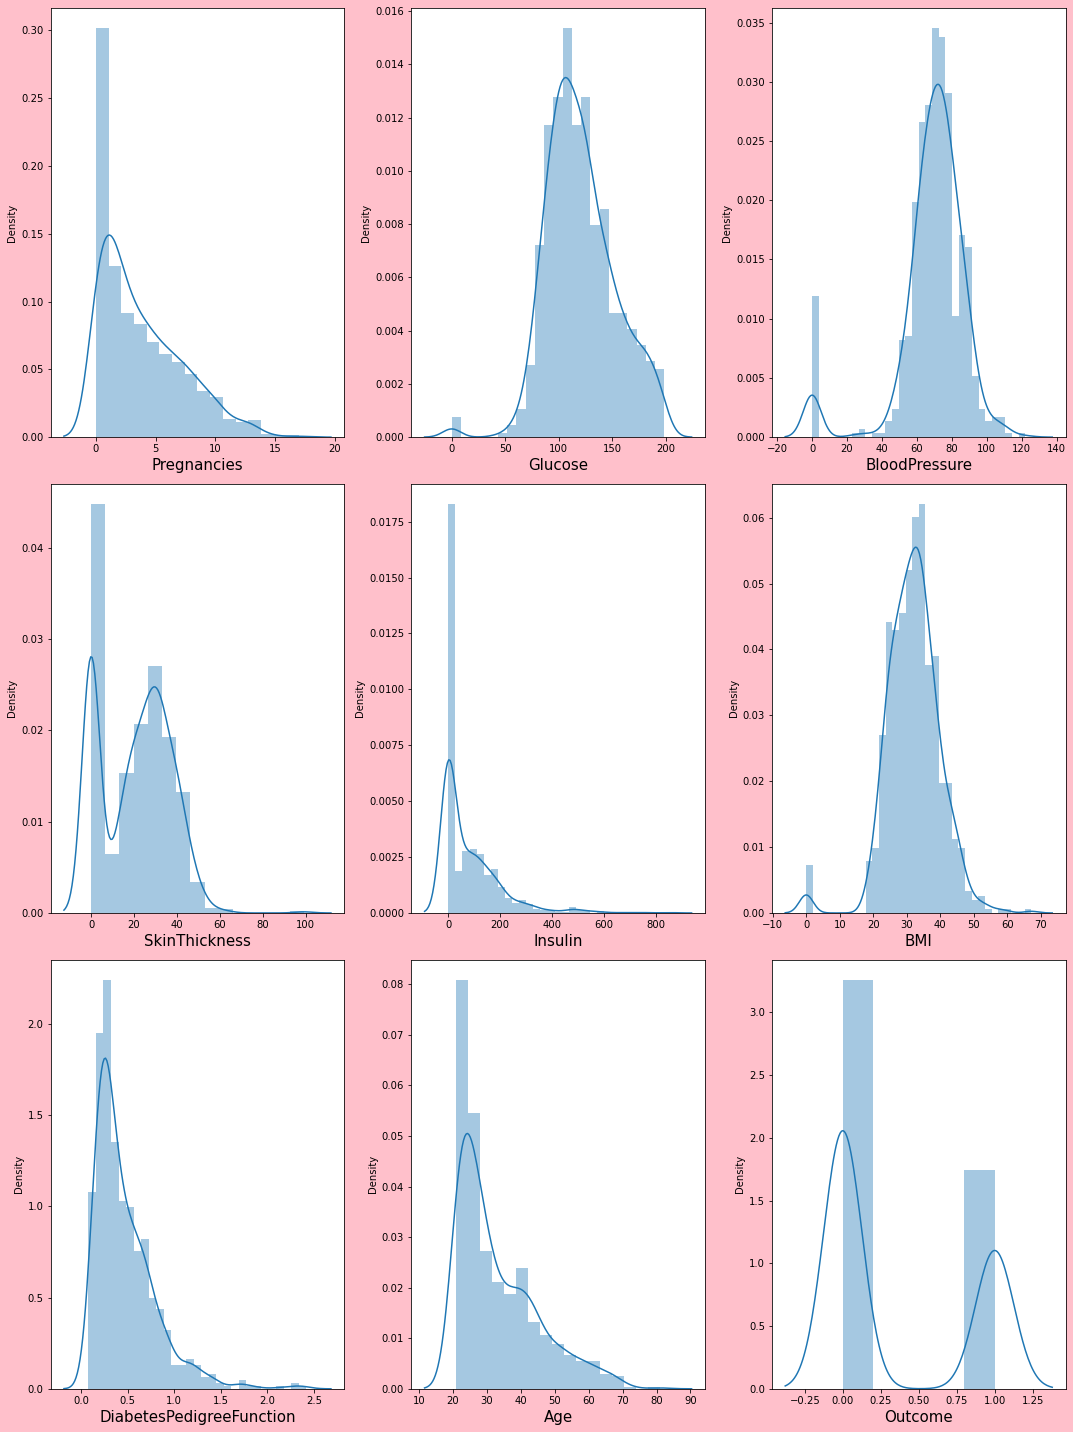

In [5]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,20), facecolor = 'pink')
plotnumber = 1

for column in data:
    if plotnumber<=9 :    #as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()    

We can see there is some Skewness in the data let's deal with the data

Also, we can see there few data for column Glucose, Insulin, Skin Thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. We can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [6]:
# Replacing zero values with the mean of the column

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())

data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

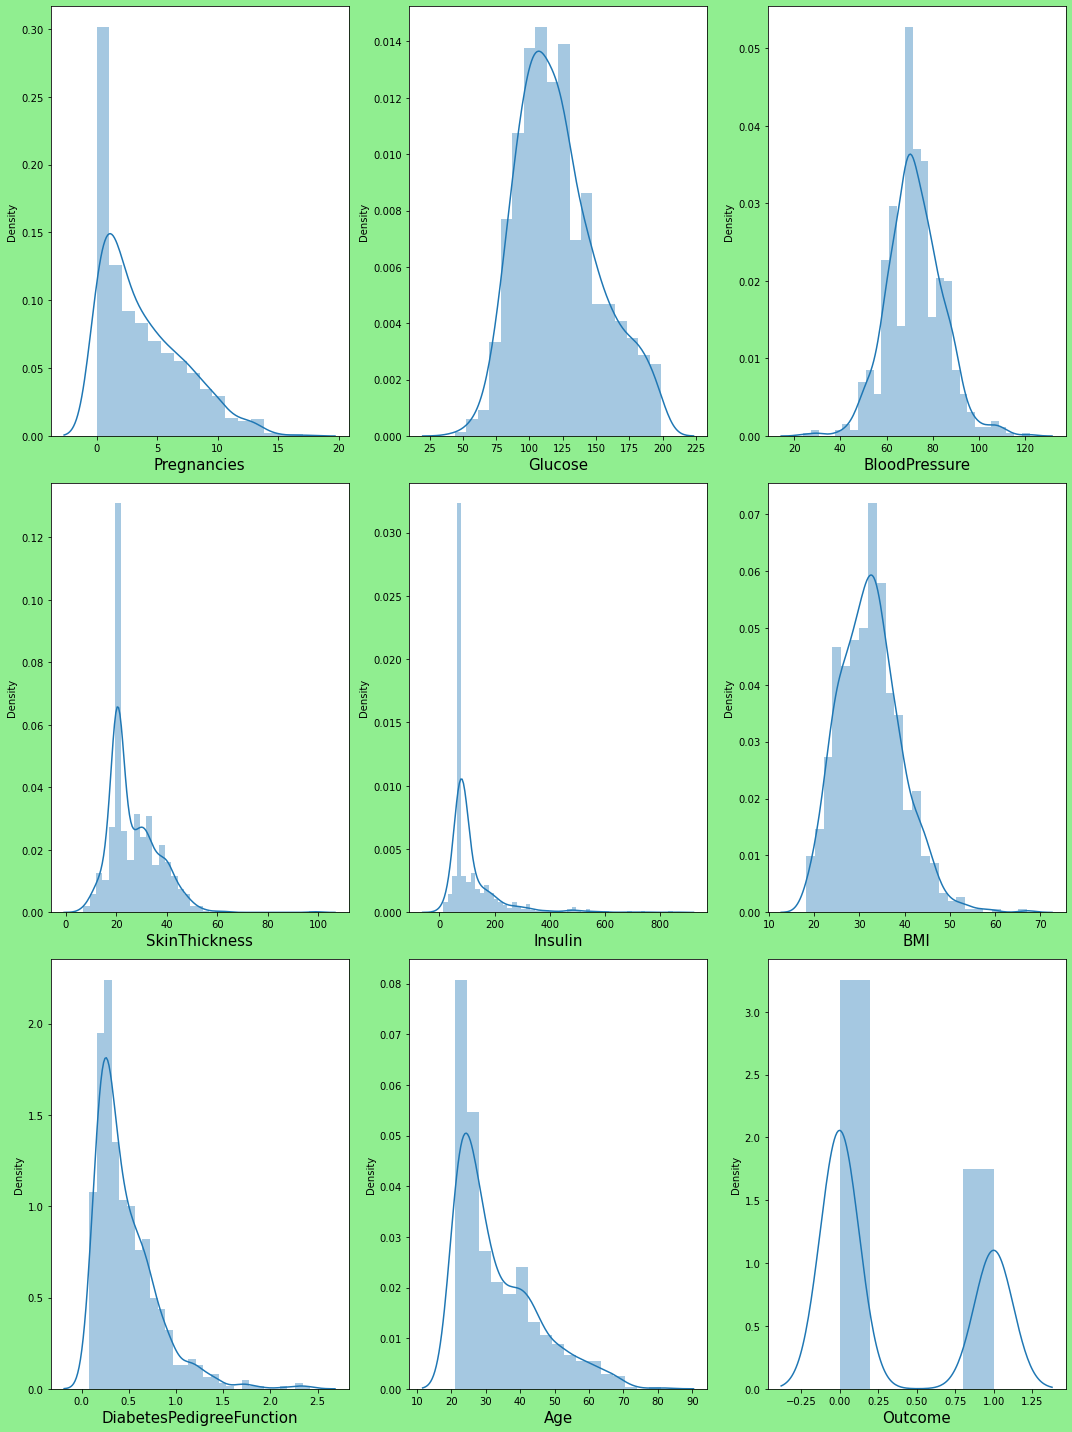

In [7]:
# Let's see how data is distributed for every column
plt.figure(figsize=(15,20), facecolor = 'LightGreen')
plotnumber = 1

for column in data:
    if plotnumber<=9 :   
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()   

Now we have dealt with 0 values and data looks better. But, there still are outliers present in some columns. Let's deal with them.

In [8]:
df_features = data.drop('Outcome', axis=1)

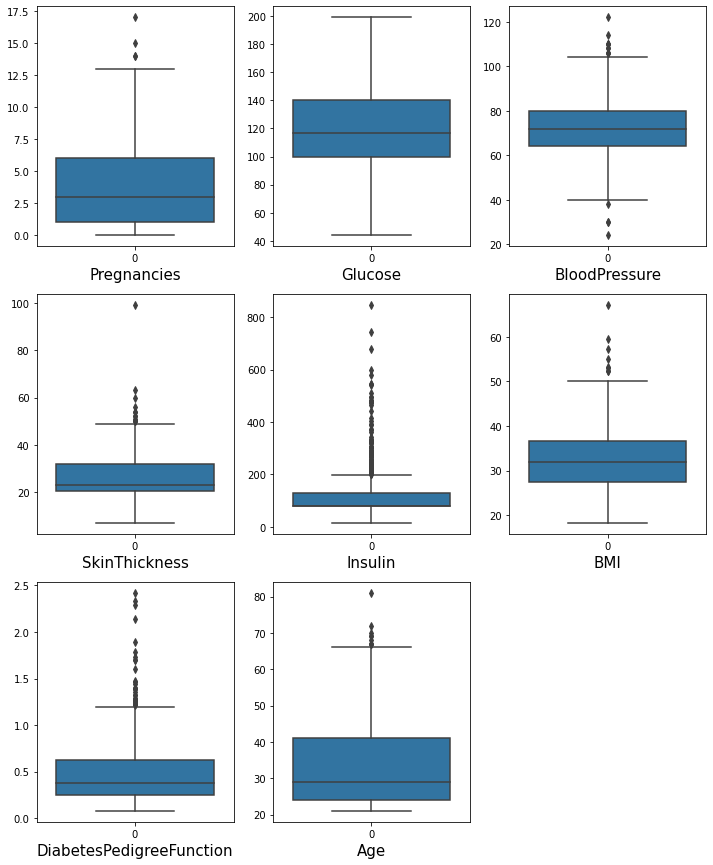

In [9]:
# Visualise the outliers using boxplot

plt.figure(figsize=(12,15))
graph = 1

for column in df_features:
    if graph<= 9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data= df_features[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()    

In [10]:
data.shape

(768, 9)

In [11]:
# Find the IQR (inter quantile range) to identify outliers

# 1st quantile
q1 = data.quantile(0.25)

# 3rd quantile
q3 = data.quantile(0.75)

# IQR
iqr = q3 - q1

## Outlier detection formula

### higher side ==> Q3 + (1.5 * IQR)

### lower side ==> Q1 - (1.5 * IQR)

In [12]:
# Validating one outlier
preg_high = (q3.Pregnancies + (1.5 * iqr.Pregnancies))
preg_high

13.5

In [13]:
# Check the indexes which have higher values
index = np.where(data['Pregnancies'] > preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [14]:
# Drop the index which we found in the above cell
data = data.drop(data.index[index])
data.shape

(764, 9)

In [15]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


## Here we can see that in BP we have both higher and lower side outlier. So we have to first remove the higher side outlier and then the lower side.  

In [16]:
bp_high = (q3.BloodPressure + (1.5 * iqr.BloodPressure))
print (bp_high)

index = np.where(data['BloodPressure'] > bp_high)

data = data.drop(data.index[index])
print (data.shape)

data.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
bp_low = (q1.BloodPressure - (1.5 * iqr.BloodPressure))
print (bp_low)

index = np.where(data['BloodPressure'] < bp_low)

data = data.drop(data.index[index])
print (data.shape)

data.reset_index()

40.0
(750, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
745,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
746,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
747,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
748,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
index

(array([ 18, 121, 587, 589], dtype=int64),)

In [19]:
st_high = (q3.SkinThickness + (1.5 * iqr.SkinThickness))
print (st_high)

index = np.where(data['SkinThickness'] > st_high)

data = data.drop(data.index[index])
print (data.shape)

data.reset_index()

49.1953125
(738, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
733,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
734,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
735,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
736,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
insu_high = (q3.Insulin + (1.5 * iqr.Insulin))
print (insu_high)

index = np.where(data['Insulin'] > insu_high)

data = data.drop(data.index[index])
print (data.shape)

data.reset_index()

198.42578125
(653, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
648,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
649,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
650,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
651,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
bmi_high = (q3.BMI + (1.5 * iqr.BMI))
print (bmi_high)

index = np.where(data['BMI'] > bmi_high)

data = data.drop(data.index[index])
print (data.shape)

data.reset_index()

50.25
(651, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
646,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
647,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
648,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
649,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
dpf_high = (q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
print (dpf_high)

index = np.where(data['DiabetesPedigreeFunction'] > dpf_high)

data = data.drop(data.index[index])
print (data.shape)

data.reset_index()

1.2
(628, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
623,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
624,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
625,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
626,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
age_high = (q3.Age + (1.5 * iqr.Age))
print (age_high)

index = np.where(data['Age'] > age_high)

data = data.drop(data.index[index])
print (data.shape)

data.reset_index()

66.5
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


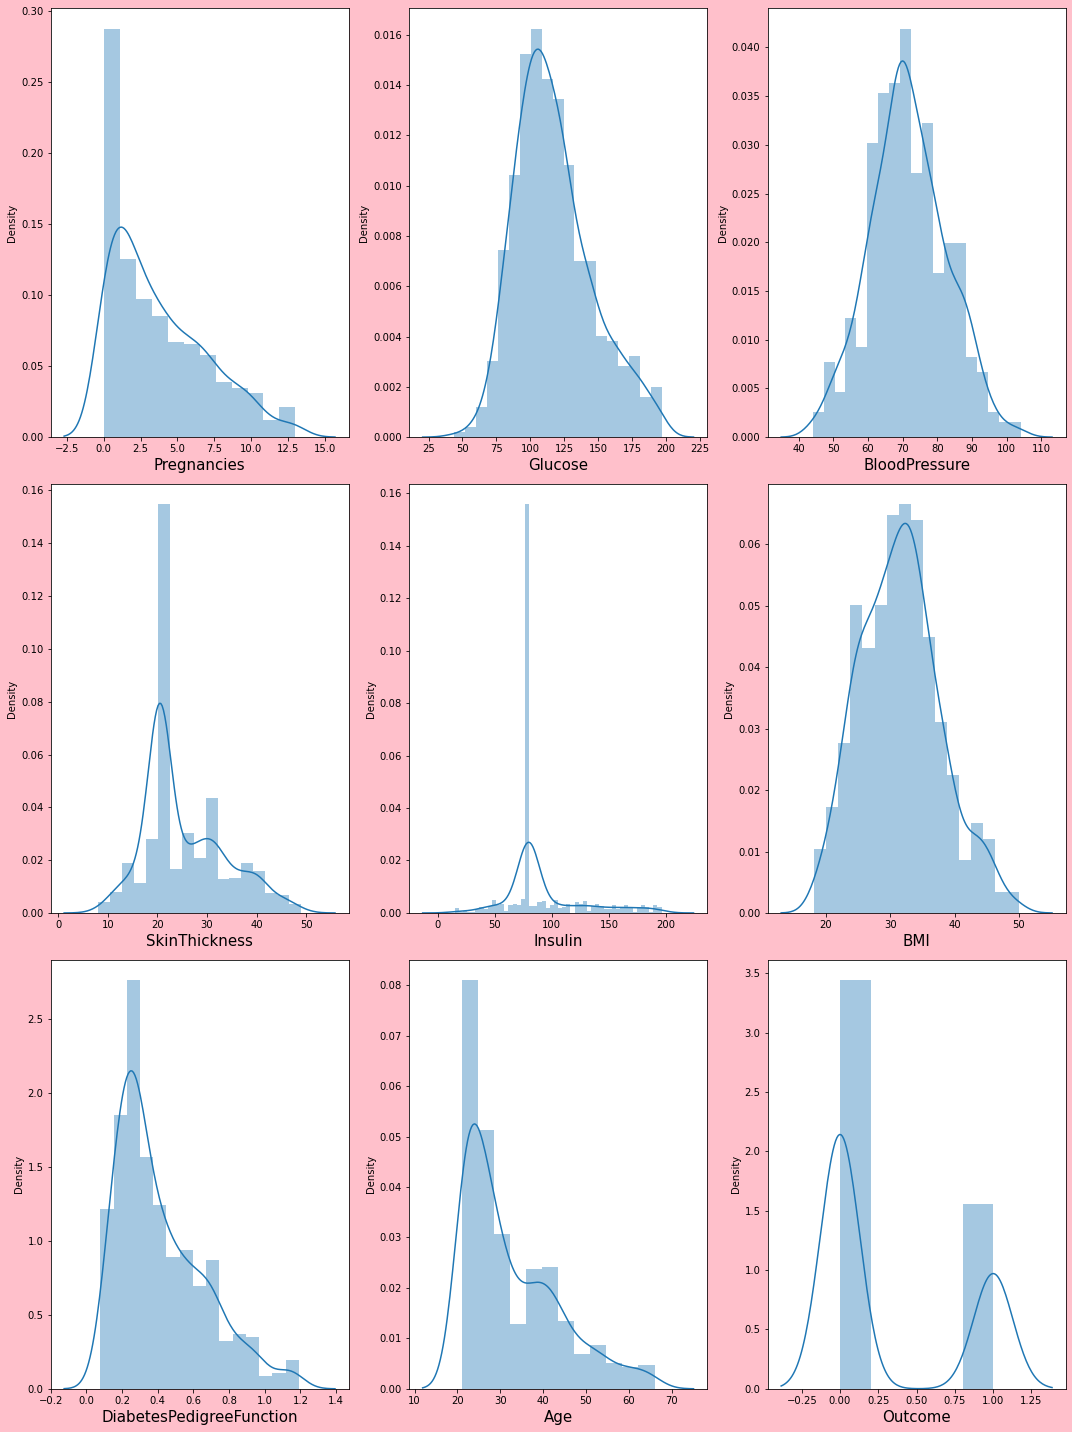

In [24]:
plt.figure(figsize=(15,20), facecolor = 'pink')
plotnumber = 1

for column in data:
    if plotnumber<=9 :    #as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()    

The data looks much better now then before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

In [25]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [26]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [27]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 619, dtype: int64

Before we fit our data to a model, let's visualise the relationship between our independent variables and the categories.

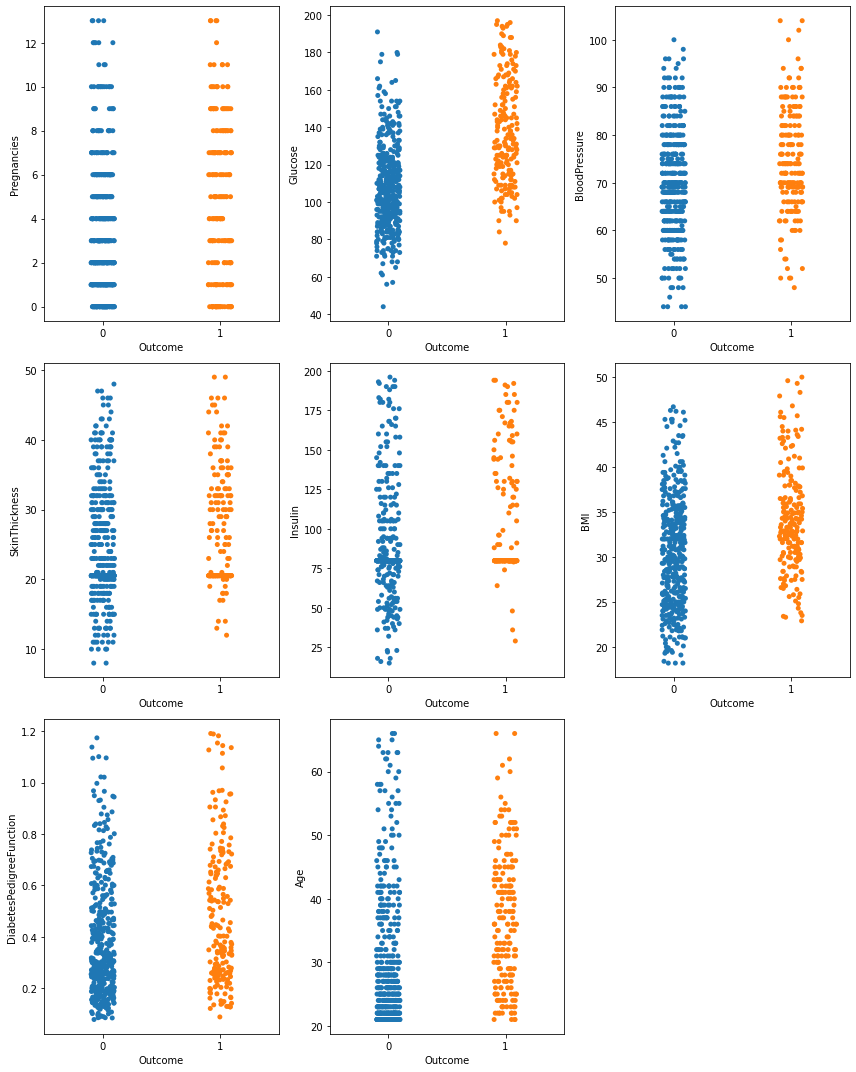

In [28]:
# let's see how features are related to class
plt.figure(figsize=(12,15))
plotnumber = 1

for column in X:
    if plotnumber<= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column]) 
    plotnumber+=1
plt.tight_layout()    


Great!!! Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

## Check multicollinearity problem. Find if one feature is dependent on another feature.

In [29]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variane Inflation factor)

In [30]:
X_scaled.shape

(619, 8)

In [31]:
# Finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1-R2))

In [32]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

# Let's check the values
vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 567)

In [34]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

Let's see how well our model performs on the test dataset.

In [35]:
x_test[1]

array([ 0.06305703, -1.22060248,  1.31280385, -0.7625645 , -0.35111818,
       -0.36169075, -0.40611327,  0.13664116])

In [36]:
y_pred = log_reg.predict(x_test)

In [37]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0], dtype=int64)

In [38]:
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7612903225806451

In [39]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[91,  8],
       [29, 27]], dtype=int64)

### Let's check Accuracy manually

### Accuracy = (TP+TN)/ (TP+TN+FP+FN)

In [40]:
(91+27)/(91+27+8+29)

0.7612903225806451

### Similarly you can manually calculate recall/precision/F1 score.

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        99
           1       0.77      0.48      0.59        56

    accuracy                           0.76       155
   macro avg       0.76      0.70      0.71       155
weighted avg       0.76      0.76      0.75       155



In [43]:
# ROC Curve
fpr,tpr, thresholds = roc_curve(y_test, y_pred)

In [44]:
# thresholds[0] means no instances predicted (it should be read from 0 - max)
print('Thresholds =', thresholds)
print('True Positive rate =', tpr)
print('False Positive rate =', fpr)

Thresholds = [2 1 0]
True Positive rate = [0.         0.48214286 1.        ]
False Positive rate = [0.         0.08080808 1.        ]


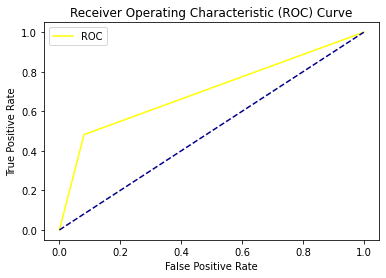

In [45]:
plt.plot(fpr, tpr, color='yellow', label='ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [46]:
# how much area it is covering (AUC)
auc_score = roc_auc_score(y_test, y_pred)
print (auc_score)

0.7006673881673882


### What is the significance of Roc curve and AUC?

In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. Suppose we have created Logistic regression, SVM as well as clustering model for classification purpose. We will calculate AUC for all the models separately. The model with the highest AUC value will be the best model to use.

### Advantages of Logistic Regression

* It is veery simple and easy to implement.
* The out put is more informative than other classification algorithms
* It expresses the relationship between independent and dependent variables
* Very effective with linearly seperable data.


### Disadvantages of Logistic Regression

* Not effective with data which are not linearly seperable
* Not as powerful as other classification models.
* Multiclass classifications are much easier to do with other algorithms than logistic regression
* It can only predict categorical outcomes.